In [40]:
# Initialize Otter
import otter
grader = otter.Notebook()

# DATA 601: HW2

## Fall 2020

### Due: Wed. Sep. 30, 2020 (by 23:55) 

**Learning Objectives**
- Work with realworld datasets that can be represented using linear data structures.
- Apply vectorization concepts to an iterative problem.
- Explore different programming paradigms to solve problems.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,
- you have followed the instructions outlined in the last cell of this notebook to prepare your work for submission on Gradescope.ca.

_You do not need to submit the datasets provided for this homework._

## Warm up

In this notebook, we'll use file input/output operations provided by Python to read in data from text files. The function needed to read data is provided in the code cell below. You may wish to review the following section from the Python Tutorial:  

- [Reading and Writing Files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

In [41]:
import re

def fileToList( fname, regexp=r'\W+' ):
    '''Read text from a file using the provided regular expression. If no regular expression is provided, 
    the default behaviour is to split the text into words removing any punctuation and empty strings. 
    The resulting words are returned in a list.'''
    file = open(fname, 'rt', encoding='utf8')
    text = file.read()
    file.close()
    # split based on provided regular expression and remove empty strings
    # By default, matches words.
    return [x for x in re.split(regexp, text) if x]

<!-- BEGIN QUESTION -->

## Question 1 (10 points)

### Text frequency analysis

This question asks you to perform a simple text frequency analysis on the novel "Moby Dick" by Herman Melville.

- Read in the relevant data:

  - Use the function `fileToList` (defined above) to read the novel from a text file (provided with the homework - date courtesy of [Project Gutenberg](http://www.gutenberg.org/ebooks/2701)). Please use the function's default behaviour, i.e. you do not need to supply a regular expression.
  - Use the function `fileToList` (again using its default behaviour), to read the 100 most frequently occurring words in the English language (provided with the homework).

Now perform the following tasks. You may use any built-in data structures or functions as well as `numpy`.

- For each of the 100 most frequently occurring words, determine how many times the word appears in the novel. Keep a record of this tally in a suitable data structure.
- Rank your tallied results; the most frequent word gets rank 1, the second most frequent gets rank 2, and so on.
- Plot a rank-frequency distribution, with rank on the horizontal axis and frequency on the vertical axis.

Please provide code for the tasks above in the cell below.

<!--
BEGIN QUESTION
name: q1_code
manual: true
points: 8
-->

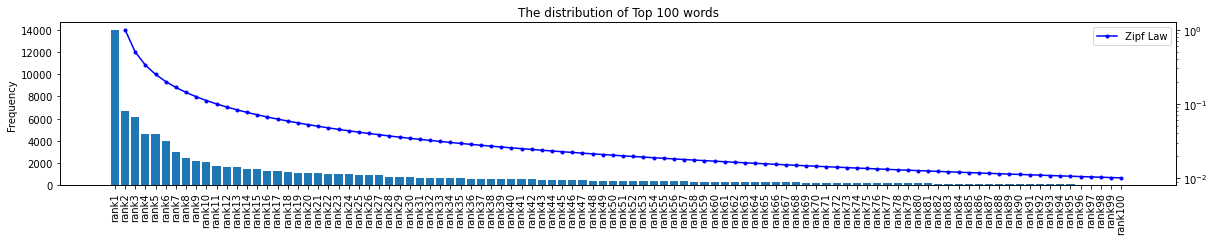

In [42]:
import numpy as np
import matplotlib.pyplot as plt

Text =fileToList('moby_dick.txt')
Top100 =fileToList('top100.txt')

TOP= [x for x in Text if x in Top100]
key, frequency = np.unique(TOP, return_counts = True)
TEXT = np.asarray((key, frequency ))
count_sort_ind = np.argsort(-frequency)
key,frequency=key[count_sort_ind],frequency[count_sort_ind]
key = ['rank' + str(x+1) for x in range(len(key))]
fig, ax = plt.subplots(figsize = (20,3))

plt.xticks(rotation='vertical')
plt.bar(key, frequency)
plt.ylabel('Frequency')
ax3 = ax.twinx()
n= np.arange(1,100)
plt.semilogy(n,1/n,'b.-',label='Zipf Law')
plt.title("The distribution of Top 100 words")
plt.legend()
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Please use the Markdown cell below to answer the following question:

- What kind of a trend does the rank-frequency distribution show? Is your result consistent with [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)?

<!--
BEGIN QUESTION
name: q1_written
manual: true
points: 2
-->

The frequency decreases rapid with rank going up. It is consistent with Zipf's Law as shown in the graph above.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2 (10 points):

### Visualizing Trends in an Index

This question asks you to plot the Bitcoin price index (BPI) along with 5-day and 10-day averages. The provided dataset (in csv format) contains the daily closing price (in USD) from Sep. 22, 2019 to Sep. 21, 2020 (data obtained from https://www.coindesk.com/price/). Perform the following tasks. You may use any built-in Python functions as well as data strucutres and functions provided by the `numpy` library. However, please do not use `pandas`. 

- Read the dataset using the `fileToList` function defined above. For this question, use the regular expression `r'[,\r\n]+'` rather than the default. Inspect the result and familiarize yourself with the content of the returned list.
- Observe that the closing prices are at a daily interval. We therefore do not need the date information. Clean up the data and only retain the price information. Store the result in a list or a `numpy` array in floating point format.
- Recall that a [simple moving average](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) is defined as the (unweighted) mean over the previous $N$ days.<br> 
Perform a simple moving average of the price index. The number of days $N$ to average over should be adjustable. If you are using `numpy`, you may find the function [`np.convolve`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html) helpful.  
- Plot the raw price index data along with 5-day and 10-day simple moving average. Plot on the same figure in order to help you visually ascertain the effect of the filter.

Please provide code for the tasks above in the cell below.

<!--
BEGIN QUESTION
name: q2_code
manual: true
points: 8
-->

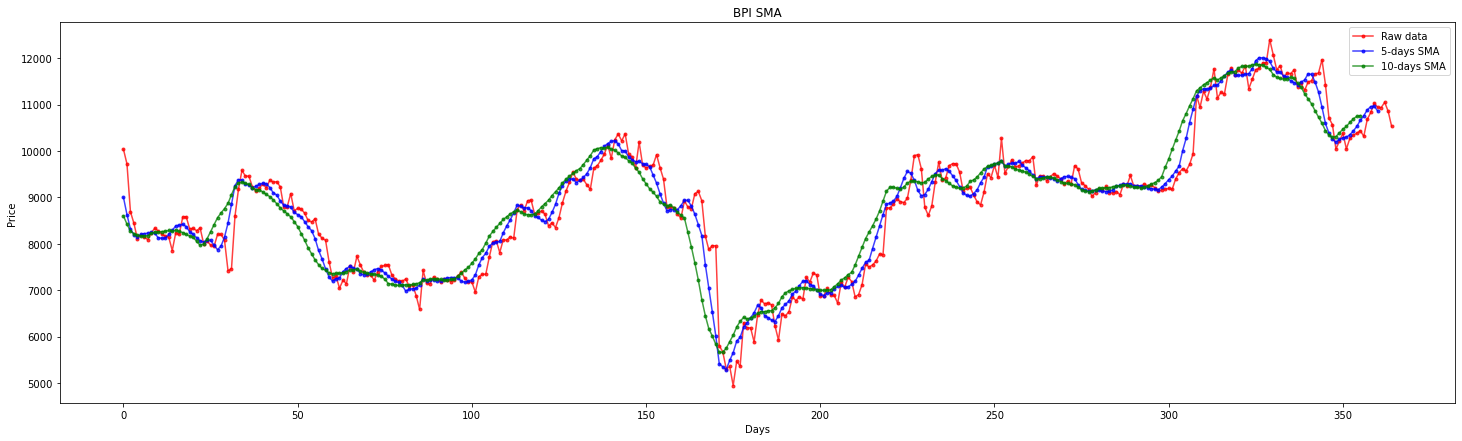

In [43]:
import re
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def fileToList( fname, regexp=r'\W+' ):
    '''Read text from a file using the provided regular expression. If no regular expression is provided, 
    the default behaviour is to split the text into words removing any punctuation and empty strings. 
    The resulting words are returned in a list.'''
    file = open(fname, 'rt', encoding='utf8')
    text = file.read()
    file.close()
    # split based on provided regular expression and remove empty strings
    # By default, matches words.
    return [x for x in re.split(regexp, text) if x]
T = fileToList("Q2.csv", r'[,\r\n]+')
T_array = np.array(T)
New_array = T_array[1::2]
Date = T_array[0::2]


def sma(data,windows):
    A=np.convolve(data,np.ones(windows),'valid')/windows
    return A
Price = New_array.astype(np.float)
windows1 = 5
windows2 = 10

fig,ax = plt.subplots(figsize=(25,7))
fig0 = plt.plot(list(range(len(Price))),Price, label = 'Raw data', color='red', marker='.',alpha = 0.75)
fig1 = plt.plot(list(range(len(sma(Price,windows1)))),sma(Price, windows1), label = '5-days SMA',color='blue', marker='.',alpha = 0.75)
fig2 = plt.plot(list(range(len(sma(Price,windows2)))),sma(Price, windows2), label = '10-days SMA',color='green', marker='.',alpha = 0.75)


plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('BPI SMA')
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Please use the Markdown cell below to answer the following questions.

- What is the effect of the moving average filter? 
- In what circumstances would you _not_ want to use a moving average?

<!--
BEGIN QUESTION
name: q2_written
manual: true
points: 2
-->

- It reduces the noise of the data and makes data look smoothier. It shows the trends of the price at given time period.
- When dataset is small and not enough to reflet the trend. Also SMA can only reflect the trend in the past and is not able to predict the price in the future. Moreover, if the price fluctuate dramatically, SMA won't prvide a meaningful trend, either.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3 (10 points):

### Vectorized Race Simulation

Eight athletes are competing in a 1500m race. Using `numpy`, write a _vectorized_ race simulation according to the following criteria:
  - The granularity of the simulation is 1 s, i.e. each iteration in your simulation represents 1 second.
  - During each iteration, each athelete can randomly take 1, 2, 3, or 4 steps. Each step is 1 m long and is equally likely.
  - When the race is complete, return the winner and the winning time. There should not be any ties. If there is a tie, select a winner at random.  
  
  Please pay attention to the following:
  - There should only be one loop in your simulation: the loop that advances the simulation by a second. 
  - All other operations should be done using vectorized array operations and boolean indexing.
  - The following numpy functions will be helpful:<br>
    - [`numpy.random.randint`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)
    - [`numpy.sum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)
    - [`numpy.random.choice`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html)
    
Please write your simulation code in the code cell below: 

<!--
BEGIN QUESTION
name: q3_codeA
manual: true
points: 6
-->

In [44]:
import numpy as np
def stim_race():
    Athelete = np.zeros(shape=(8))
    time = 0
    while max(Athelete)< 1500:
        Athelete = Athelete + np.random.randint(1,5,8)
        time = time +1  
    position =np.where(Athelete==Athelete.max())[0]
    if len(position)>1:
        position = [np.random.choice(position)]
    return [position[0],time]
print(stim_race())



[7, 586]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Run Some Simulations

Run your simulation 1000 times. For each run, record the winner and the winning time. Produce a bar chart showing the number of times each athelete won. Also display a bar chart showing the average winning time for each athlete. 

<!--
BEGIN QUESTION
name: q3_codeB
manual: true
points: 4
-->

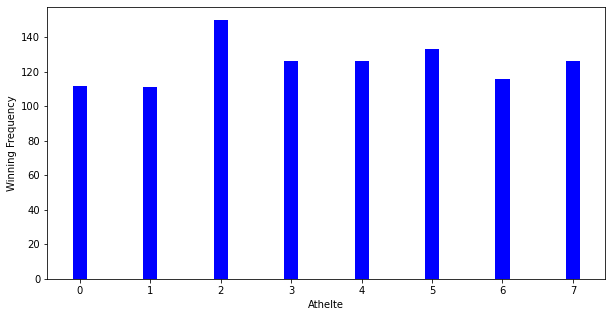

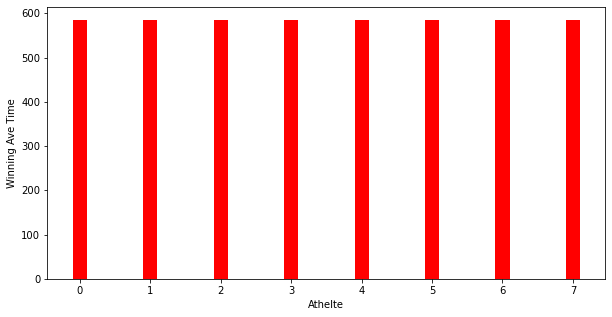

In [45]:
import matplotlib.pyplot as plt
N = 1000
A = []
for i in range(N):
    A = np.append(A,stim_race())

A=np.reshape(A,(N,2))

unique, frequency = np.unique(A[:,0], return_counts = True)
sumtime=np.zeros(shape=(8))

for i in range(8):
    for j in range(N):
        if A[:,0][j] == i:
            sumtime[i]+=(A[:,1][j])
    Ave_time = sumtime[i]/frequency[i]
    
plt.figure(figsize=(10,5))
width = 0.2
plt.bar(unique,frequency,width,color='b')
plt.ylabel('Winning Frequency')
plt.xlabel('Athelte')
plt.title("Distribution of Winner and Frequency")
plt.show() 

plt.figure(figsize=(10,5))
plt.bar(unique,Ave_time,width,color='r')
plt.xlabel('Athelte')
plt.ylabel('Winning Ave Time')
plt.title("Distribution of Average Winning Time for Athlete")
plt.show()   
    

## ---

To double-check your work, the cell below will rerun all of the autograder tests.

In [46]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [47]:
# Save your notebook first, then run this cell to export your submission.
grader.export("HW2.ipynb", pdf=False)